In [12]:
from time import perf_counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Задание 1

In [3]:
# Создаем два списка и два массива с 1 миллионом элементов
np.random.seed(0)
lst1 = [np.random.rand() for i in range(1000000)]
np.random.seed(0)
lst2 = [np.random.rand() for i in range(1000000)]
arr1 = np.array(lst1)
arr2 = np.array(lst2)

In [4]:
# Измеряем время выполнения операции поэлементного перемножения для списков
start = perf_counter()
lst_mult = [lst1[i] * lst2[i] for i in range(len(lst1))]
end = perf_counter()
lst_time = end - start

In [5]:
# Измеряем время выполнения операции поэлементного перемножения для массивов
start = perf_counter()
arr_mult = np.multiply(arr1, arr2)
end = perf_counter()
arr_time = end - start

In [6]:
# Выводим результаты
print("Время выполнения операции поэлементного перемножения для списка:", lst_time)
print("Время выполнения операции поэлементного перемножения для массива:", arr_time)

Время выполнения операции поэлементного перемножения для списка: 0.11147686099999987
Время выполнения операции поэлементного перемножения для массива: 0.003117216000006806


# Задание 2

In [8]:
!wget https://github.com/ITMOPython-2022/Lab-7/raw/main/data2.csv

--2023-02-21 16:15:33--  https://github.com/ITMOPython-2022/Lab-7/raw/main/data2.csv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ITMOPython-2022/Lab-7/main/data2.csv [following]
--2023-02-21 16:15:33--  https://raw.githubusercontent.com/ITMOPython-2022/Lab-7/main/data2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1152316 (1.1M) [text/plain]
Saving to: ‘data2.csv’

data2.csv           100%[===================>]   1.10M  --.-KB/s    in 0.02s   

2023-02-21 16:15:33 (53.8 MB/s) - ‘data2.csv’ saved [1152316/1152316]



In [34]:
# Загружаем данные из файла data2.csv
data = pd.read_csv('data2.csv')

In [35]:
data.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3.633163,179.350577,28584.175810,5.246382,292.440536,500.866018,8.956401,77.360985,3.349572,1
1,8.860451,193.743105,24085.112140,6.183110,NaN,526.704924,9.901328,81.339340,4.677713,1
2,10.137932,242.005716,15088.827653,8.677789,NaN,596.346346,14.971199,62.365824,3.872018,1
3,9.900815,199.083752,16233.134679,8.146643,380.113030,345.019852,20.386720,73.381488,2.395002,1
4,10.268431,218.216682,13753.993373,7.512608,334.178075,341.602209,15.671564,84.682660,4.304689,1


In [36]:
data.ph.isna().sum()

1058

In [37]:
data = data.dropna()

In [38]:
# Выделяем данные из столбца 1 и преобразуем их в массив NumPy
data = data.ph.to_numpy()

In [39]:
type(data)

numpy.ndarray

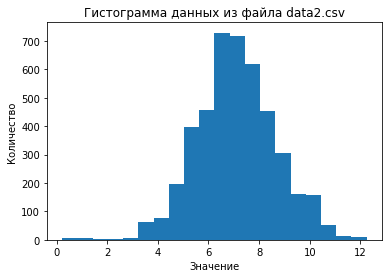

In [40]:
# Строим гистограмму
plt.hist(data, bins=20)
plt.title("Гистограмма данных из файла data2.csv")
plt.xlabel("Значение")
plt.ylabel("Количество")
plt.show()

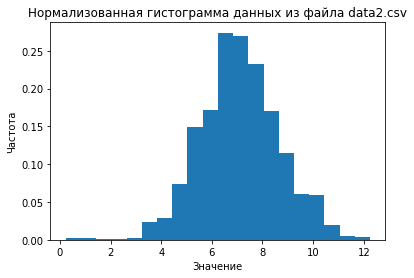

In [41]:
# Строим нормализованную гистограмму
plt.hist(data, bins=20, density=True)
plt.title("Нормализованная гистограмма данных из файла data2.csv")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.show()

In [43]:
# Выводим среднеквадратичное отклонение
print("Среднеквадратичное отклонение:", round(np.std(data), 3))

Среднеквадратичное отклонение: 1.561


# Задание 3

Для построения трехмерного графика согласно формуле x ∈ (-2π; 2π); y = sin(x)cos(x); z = sin(x)cos(x) сначала необходимо создать массив x из значений x в интервале (-2π; 2π) с помощью функции np.linspace():

In [26]:
x = np.linspace(-2*np.pi, 2*np.pi, 1000)

Затем вычисляем массивы y и z по заданной формуле:

In [27]:
y = np.sin(x) * np.cos(x)
z = np.sin(x) * np.cos(x)

И, наконец, строим трехмерный график с помощью функции Axes3D:

matplotlib.axes._subplots.Axes3DSubplot

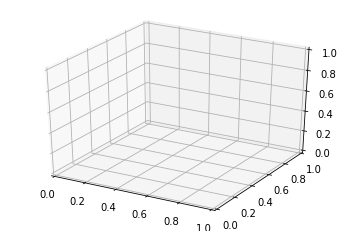

In [30]:
fig = plt.figure()
type(fig.add_subplot(111, projection='3d'))

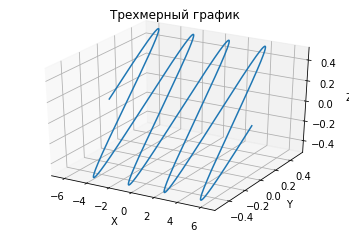

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_title("Трехмерный график")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

На графике видно, что функция имеет вид трехмерной спирали.